In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Summarization

In [61]:
#Read the dataset
training_df =pd.read_excel('Doctor_Train_Data.xlsx')
testing_df =pd.read_excel('Doctor_Test_Data.xlsx')

In [3]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [62]:
training_df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


    Some outliers can be seen as there is gap between 75% and max and also right skewed data since mean>50%.

# Data Visualization and Manipulation

In [5]:
training_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


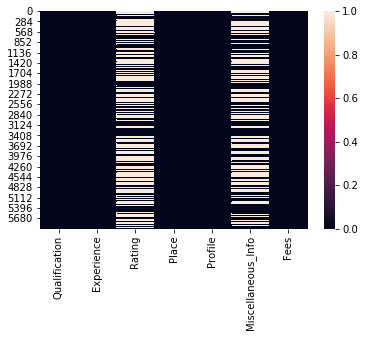

In [6]:
sns.heatmap(training_df.isnull())

     There are many null values in Rating and Miscellaneous Info column.

Text(0.5, 1.0, "Distribution of Doctor's Consultation Fees")

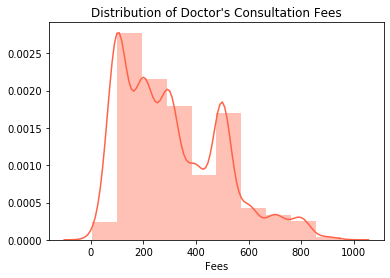

In [7]:
sns.distplot(training_df['Fees'],bins=10,color='Tomato')
plt.title("Distribution of Doctor's Consultation Fees")

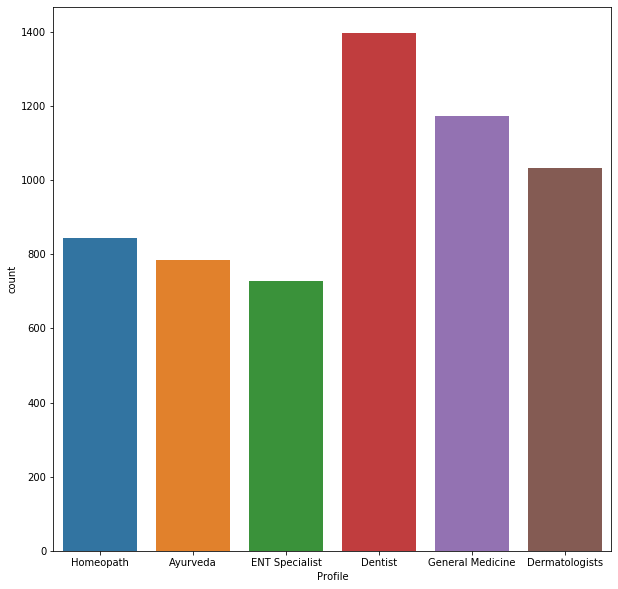

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(training_df['Profile'])

    Highest profile of Doctors given is of Dentist, followed by General Medicine and then Dermatologists.

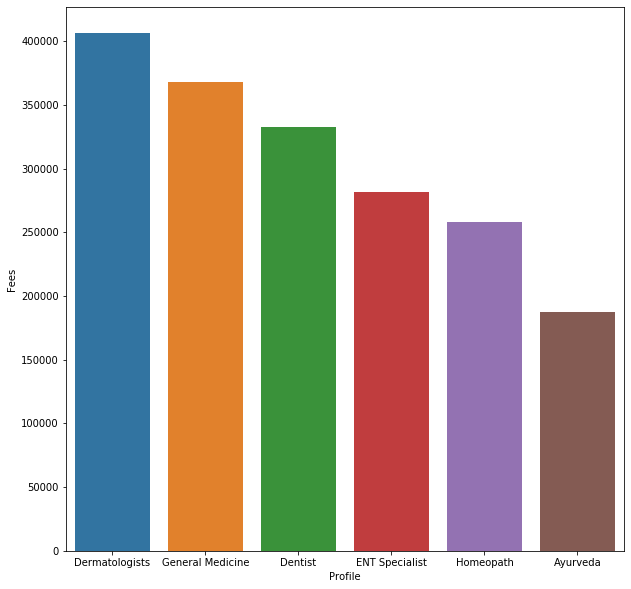

In [9]:
fees = pd.DataFrame(training_df.groupby('Profile',as_index=False)['Fees'].sum()).sort_values(by='Fees',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x='Profile',y='Fees',data=fees)

     Dermatologist have high consultancy fee, followed by General Medicine and Dentists. Ayurvedic Doctors charges the 
     least.

In [10]:
training_df_qualifications = training_df['Qualification'].apply(lambda x: pd.Series(x.split(',')))
print("Missing values in each columns :")
print(training_df_qualifications.isnull().sum())

Missing values in each columns :
0       0
1    1962
2    4590
3    5585
4    5842
5    5926
6    5949
7    5955
8    5957
9    5960
dtype: int64


Based on this output, we will eliminate all the columns except 0 and 1 as rest of them has to many missing values.

In [11]:
testing_df_qualifications = testing_df['Qualification'].apply(lambda x: pd.Series(x.split(',')))
print("Missing values in each columns :")
print(testing_df_qualifications.isnull().sum())

Missing values in each columns :
0        0
1      609
2     1498
3     1864
4     1951
5     1979
6     1984
7     1985
8     1985
9     1986
10    1986
11    1986
12    1986
13    1986
14    1986
15    1986
16    1986
dtype: int64


 For testing data we will remove columns from 2 to 16.

In [12]:
#dont drop here..add as none to all columnc
for i in range(2,10):
    training_df_qualifications.drop(i,axis=1,inplace=True)

for i in range(2,17):
    testing_df_qualifications.drop(i,axis=1,inplace=True)


In [13]:
training_df[['Qualification_1','Qualification_2']] = training_df_qualifications[[0,1]]
testing_df[['Qualification_1','Qualification_2']] = testing_df_qualifications[[0,1]]

In [18]:
#modifying training_data
training_df['Rating'].replace(r'%$','',regex=True,inplace=True)
training_df['Experience(in Years)'] = training_df['Experience'].str.replace(r"[^0-9]",'')
training_df[['Recommendation(in percentage)','Extra_info']] = testing_df.Miscellaneous_Info.str.split(r"[^0-9]",n=1,expand=True)
training_df[['Comments','Reviews']] = training_df.Extra_info.str.split(r"[^0-9]",n=1,expand=True)
training_df['Reviews'] = training_df['Reviews'].str.split(' ',1,expand=True)
training_df['Reviews'] = training_df['Reviews'].replace(r"[a-zA-z]",np.NaN,regex=True)
training_df[['Area','City']] = training_df.Place.str.split(',',n=1,expand=True)

In [19]:
#modifying testing_data
testing_df['Rating'].replace(r'%$','',regex=True,inplace=True)
testing_df['Experience(in Years)'] = testing_df['Experience'].str.replace(r"[^0-9]",'')
testing_df[['Recommendation(in percentage)','Extra_info']] = testing_df.Miscellaneous_Info.str.split(r"[^0-9]",n=1,expand=True)
testing_df[['Comments','Reviews']] = testing_df.Extra_info.str.split(r"[^0-9]",n=1,expand=True)
testing_df['Reviews'] = testing_df['Reviews'].str.split(' ',1,expand=True)
testing_df['Reviews'] = testing_df['Reviews'].replace(r"[a-zA-z]",np.NaN,regex=True)
testing_df[['Area','City']] = testing_df.Place.str.split(',',n=1,expand=True)

In [20]:
#Qualification,Experience,Miscellaneous_Info,Extra_info,Comments,Recommendation(in percentage),Place can be dropped

cols = ['Qualification','Experience','Miscellaneous_Info','Extra_info','Comments','Recommendation(in percentage)','Place']

for i in range(len(cols)):
    training_df.drop(cols[i],axis=1,inplace=True)
    testing_df.drop(cols[i],axis=1,inplace=True)
        

In [22]:
#drop these rows as they dont have much information
training_df[training_df['Area'].isnull()]

,Rating,Profile,Fees,Qualification_1,Qualification_2,Experience(in Years),Reviews,Area,City
91,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,3,NaN,NaN
502,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
599,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
605,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,12,NaN,NaN
724,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1002,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1083,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1210,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
2078,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
2178,NaN,Dermatologists,100,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN


In [23]:
drop_rows =training_df[training_df['Area'].isnull()]
training_df.drop(drop_rows.index,axis=0,inplace=True)

In [24]:
#drop these rows as they dont have much information
testing_df[testing_df['Area'].isnull()]

,Rating,Profile,Qualification_1,Qualification_2,Experience(in Years),Reviews,Area,City
381,NaN,Dermatologists,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1494,NaN,Dermatologists,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1644,NaN,Dermatologists,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1838,NaN,Dermatologists,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1925,NaN,Dermatologists,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN
1930,NaN,Dermatologists,Get inspired by remarkable stories of people l...,NaN,0,NaN,NaN,NaN


In [25]:
drop_rows =testing_df[testing_df['Area'].isnull()]
testing_df.drop(drop_rows.index,axis=0,inplace=True)

In [26]:
training_df[training_df['City'].isnull()]

,Rating,Profile,Fees,Qualification_1,Qualification_2,Experience(in Years),Reviews,Area,City
3980,NaN,Dentist,250,BDS,NaN,23,NaN,e,None


In [27]:
training_df['Area'][3980] = 'Electronic City'
training_df['City'][3980] = ' Bangalore'

In [28]:
training_df['Reviews'].replace(np.NaN,0,inplace=True)
training_df['Rating'].replace(np.NaN,0,inplace=True)
training_df['Reviews'].replace('',0,inplace=True)

testing_df['Reviews'].replace(np.NaN,0,inplace=True)
testing_df['Rating'].replace(np.NaN,0,inplace=True)

In [29]:
training_df['Qualification_2'].replace(np.NaN,'None',inplace=True)
testing_df['Qualification_2'].replace(np.NaN,'None',inplace=True)


In [30]:
training_df

,Rating,Profile,Fees,Qualification_1,Qualification_2,Experience(in Years),Reviews,Area,City
0,100,Homeopath,100,BHMS,MD - Homeopathy,24,0,Kakkanad,Ernakulam
1,98,Ayurveda,350,BAMS,MD - Ayurveda Medicine,12,0,Whitefield,Bangalore
2,0,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,9,4,Mathikere - BEL,Bangalore
3,0,Ayurveda,250,BSc - Zoology,BAMS,12,0,Bannerghatta Road,Bangalore
4,100,Ayurveda,250,BAMS,None,20,0,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...
5956,98,ENT Specialist,300,MBBS,MS - ENT,19,0,Basavanagudi,Bangalore
5957,0,General Medicine,100,MBBS,None,33,0,Nungambakkam,Chennai
5958,97,General Medicine,600,MBBS,None,41,0,Greater Kailash Part 2,Delhi
5959,90,General Medicine,100,MBBS,MD - General Medicine,15,0,Vileparle West,Mumbai


Text(0.5, 1.0, 'Experince of Doctors')

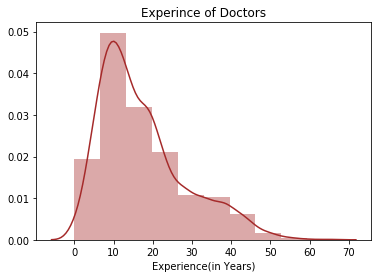

In [31]:
sns.distplot(training_df['Experience(in Years)'],bins=10,color='Brown')
plt.title("Experince of Doctors")

     Most of the doctors are experienced between 10-40 years.

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Qualification_1','Qualification_2','Profile','Area','City']

for each in range(len(cols)):
    training_df[cols[each]] = le.fit_transform(training_df[cols[each]])
    testing_df[cols[each]] = le.fit_transform(testing_df[cols[each]])

In [33]:
training_df['Qualification__1'] = training_df['Qualification_1'].astype(str).astype(int)
training_df['Qualification__2'] = training_df['Qualification_2'].astype(str).astype(int)
training_df['Experience'] = training_df['Experience(in Years)'].astype(str).astype(int)
training_df['Ratings'] = training_df['Rating'].astype(str).astype(int)
training_df['Review'] = training_df['Reviews'].astype(str).astype(int)
training_df['Profiles'] = training_df['Profile'].astype(str).astype(int)
training_df['Town'] = training_df['Area'].astype(str).astype(int)
training_df['city'] = training_df['City'].astype(str).astype(int)


testing_df['Qualification__1'] = testing_df['Qualification_1'].astype(str).astype(int)
testing_df['Qualification__2'] = testing_df['Qualification_2'].astype(str).astype(int)
testing_df['Experience'] = testing_df['Experience(in Years)'].astype(str).astype(int)
testing_df['Ratings'] = testing_df['Rating'].astype(str).astype(int)
testing_df['Review'] = testing_df['Reviews'].astype(str).astype(int)
testing_df['Profiles'] = testing_df['Profile'].astype(str).astype(int)
testing_df['Town'] = testing_df['Area'].astype(str).astype(int)
testing_df['city'] = testing_df['City'].astype(str).astype(int)



In [34]:
training_df.drop('Qualification_1',axis=1,inplace=True)
training_df.drop('Qualification_2',axis=1,inplace=True)
training_df.drop('Experience(in Years)',axis=1,inplace=True)
training_df.drop('Rating',axis=1,inplace=True)
training_df.drop('Reviews',axis=1,inplace=True)
training_df.drop('Area',axis=1,inplace=True)
training_df.drop('City',axis=1,inplace=True)
training_df.drop('Profile',axis=1,inplace=True)


testing_df.drop('Qualification_1',axis=1,inplace=True)
testing_df.drop('Qualification_2',axis=1,inplace=True)
testing_df.drop('Experience(in Years)',axis=1,inplace=True)
testing_df.drop('Rating',axis=1,inplace=True)
testing_df.drop('Reviews',axis=1,inplace=True)
testing_df.drop('Area',axis=1,inplace=True)
testing_df.drop('City',axis=1,inplace=True)
testing_df.drop('Profile',axis=1,inplace=True)




In [35]:
training_df[training_df['Review'] == 0]
#we can drop review column as more than 90% of the rows are 0.

,Fees,Qualification__1,Qualification__2,Experience,Ratings,Review,Profiles,Town,city
0,100,8,252,24,100,0,5,297,4
1,350,5,241,12,98,0,0,856,0
3,250,12,7,12,0,0,0,68,0
4,250,5,425,20,100,0,0,336,1
5,100,5,425,8,0,0,0,605,1
...,...,...,...,...,...,...,...,...,...
5956,300,78,328,19,98,0,3,70,0
5957,100,78,425,33,0,0,4,536,1
5958,600,78,425,41,97,0,4,216,3
5959,100,78,249,15,90,0,4,841,6


In [36]:
training_df.drop('Review',axis=1,inplace=True)

In [37]:
testing_df[testing_df['Review'] == 0]

,Qualification__1,Qualification__2,Experience,Ratings,Review,Profiles,Town,city
0,47,243,35,0,0,4,142,6
1,47,79,31,0,0,3,577,5
3,1,243,0,0,0,0,373,3
4,2,157,16,100,0,1,231,0
5,2,156,14,90,0,1,552,1
...,...,...,...,...,...,...,...,...
1982,1,86,10,0,0,0,58,0
1983,51,241,4,0,0,2,96,1
1984,47,153,9,0,0,4,423,1
1985,2,243,12,98,0,1,26,0


In [38]:
testing_df.drop('Review',axis=1,inplace=True)

In [39]:
#Arrange the columns as desired :
training_df = training_df[[c for c in training_df if c not in ['Qualification__1','Qualification__2','Profiles','Experience','Town','city','Ratings','Fees']] + ['Qualification__1','Qualification__2','Profiles','Experience','Town','city','Ratings','Fees']]
testing_df = testing_df[[c for c in testing_df if c not in ['Qualification__1','Qualification__2','Profiles','Experience','Town','city','Ratings']] + ['Qualification__1','Qualification__2','Profiles','Experience','Town','city','Ratings']]

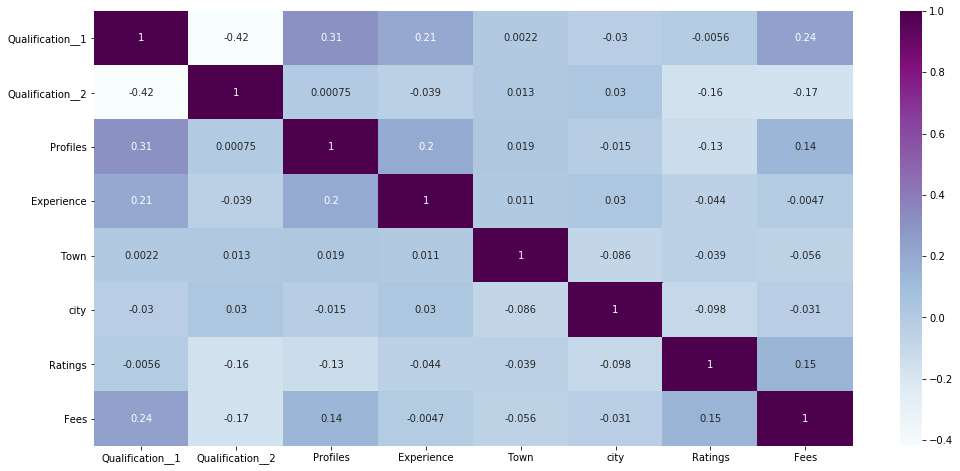

In [40]:
#Correlation : 
plt.figure(figsize=(17,8))
sns.heatmap(training_df.corr(),annot=True,cmap='BuPu')

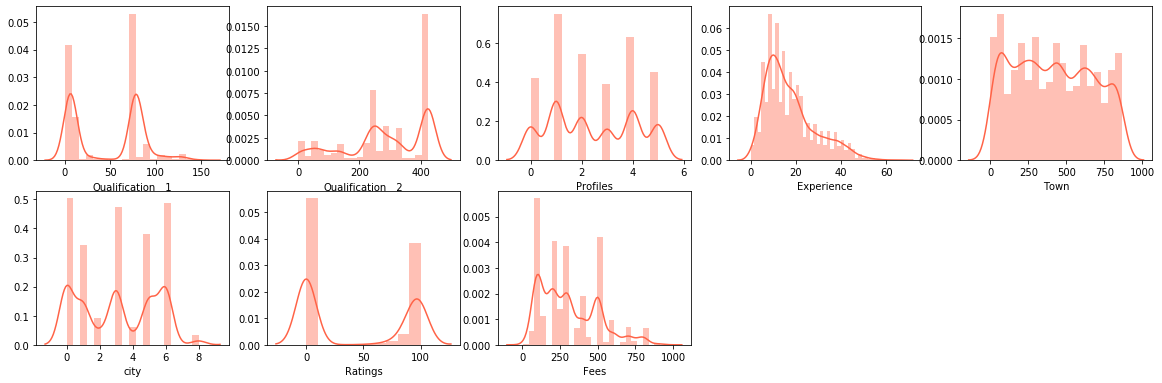

In [41]:
#Check for skewness
col = training_df.columns.values
plt.figure(figsize=(20,30))
for i in range(0,len(col)):
    plt.subplot(9,5,i+1)
    sns.distplot(training_df[col[i]],color='tomato')
plt.show()

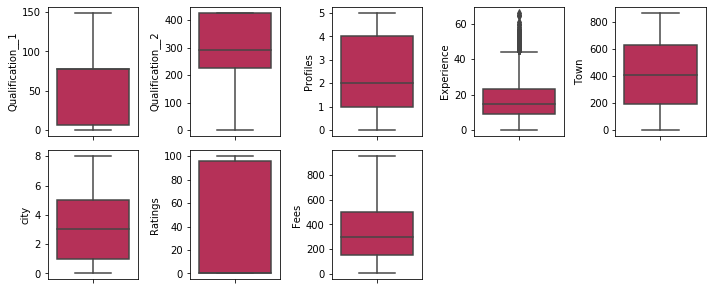

In [42]:
#Check for outliers :
plt.figure(figsize=(10,20))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.boxplot(training_df[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

In [43]:
#Use z-score to remove outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(training_df))
print(np.where(z>3))

(array([ 104,  109,  182,  274,  292,  324,  371,  896,  982, 1003, 1104,
       1306, 1623, 1852, 1973, 2015, 2054, 2156, 2192, 2242, 2252, 2271,
       2382, 2417, 2511, 2612, 2620, 2697, 3168, 3352, 3463, 3478, 3593,
       3925, 3943, 4022, 4149, 4194, 4239, 4326, 4563, 4712, 4744, 4756,
       4815, 5172, 5227, 5242, 5254, 5288, 5387, 5399, 5563, 5613, 5640,
       5696, 5782, 5917], dtype=int64), array([3, 3, 3, 7, 7, 3, 3, 3, 7, 3, 3, 7, 7, 3, 3, 3, 3, 7, 3, 7, 3, 3,
       7, 7, 7, 7, 3, 7, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 7, 7, 3, 3,
       7, 7, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))


In [44]:
#new df with no outliers.
training_df_new = training_df[(z<3).all(axis=1)]

In [45]:
from sklearn.model_selection import train_test_split

#Features where Class is the target variable
X = training_df.drop('Fees',axis=1)
y = training_df.iloc[:,-1:]

In [46]:
X.skew()

Qualification__1    0.079635
Qualification__2   -0.612021
Profiles            0.105341
Experience          1.000280
Town                0.111797
city                0.046292
Ratings             0.239630
dtype: float64

In [47]:
#To remove skewness :
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
X = pd.DataFrame(pt.fit_transform(X))

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5936 non-null   float64
 1   1       5936 non-null   float64
 2   2       5936 non-null   float64
 3   3       5936 non-null   float64
 4   4       5936 non-null   float64
 5   5       5936 non-null   float64
 6   6       5936 non-null   float64
dtypes: float64(7)
memory usage: 324.8 KB


In [49]:
#Scaling of Data - Feature Selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

# Model Prediction and Evaluation

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [51]:
model = [LR(),DTR(),KNR(),SVR(),Lasso(),Ridge(),ElasticNet()]

for i in range(len(model)):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=72)
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    r2Score = r2_score(y_test,y_pred)
    
    print("*************************************************************************************")
    print(model[i])
    print("R2 Score : ",r2Score)
    print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
    print("")
    print("*************************************************************************************")



*************************************************************************************
LinearRegression()
R2 Score :  0.08154859025802152
Mean Absolute Error :  145.63855443046484
Mean Squared Error :  32295.786832435682
Root Mean Squared Error :  179.71028582815086

*************************************************************************************
*************************************************************************************
DecisionTreeRegressor()
R2 Score :  -0.56089557263221
Mean Absolute Error :  168.62233445566778
Mean Squared Error :  54886.24672652451
Root Mean Squared Error :  234.27813966848146

*************************************************************************************
*************************************************************************************
KNeighborsRegressor()
R2 Score :  0.0076117655592988775
Mean Absolute Error :  144.35505050505049
Mean Squared Error :  34895.64993265993
Root Mean Squared Error :  186.80377387156804

*********************

In [52]:
from sklearn.model_selection import cross_val_score
for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,y,cv=4,scoring='r2')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

*************************************************************************************
Score for  LinearRegression()  : 
Score :  [0.11923642 0.09332837 0.08893729 0.10409548]
Mean :  0.10139939102497239
Standard Deviation :  0.01168197397453211
*************************************************************************************

*************************************************************************************
Score for  DecisionTreeRegressor()  : 
Score :  [-0.52634916 -0.50059427 -0.63904639 -0.47307193]
Mean :  -0.5347654389798506
Standard Deviation :  0.06308547521004552
*************************************************************************************

*************************************************************************************
Score for  KNeighborsRegressor()  : 
Score :  [-0.02796881  0.04252026  0.03686341  0.03507567]
Mean :  0.0216226321904128
Standard Deviation :  0.028763205493784395
***************************************************************************

In [53]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['linear','rbf'], 
               'gamma': [0.01, 0.1, 0.2, 0.5, 0.6],
               'C': [1, 10, 100]
              }]


gridsearch = GridSearchCV(SVR(epsilon=0.1),parameters,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(X,y)
gridsearch.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

In [54]:
svr = SVR(C=10,gamma=0.5,kernel='rbf')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = 42)
svr.fit(x_train,y_train)
score = svr.score(x_train,y_train)
print("Score for SVR : ",score)
y_pred = svr.predict(x_test)
r2Score = r2_score(y_test,y_pred)
print("R2 Score for SVR : ",r2Score)
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))


Score for SVR :  0.1592930656996645
R2 Score for SVR :  0.13710078701162265
Mean Squared Error :  31479.088598873266
Mean Absolute Error :  137.03152321972385
Root Mean Squared Error :  177.42347251385107


In [55]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR


In [56]:
ada = ABR(n_estimators=20,random_state=120)
gradient = GBR(n_estimators=20,random_state=13)
rfr = RFR(n_estimators=20,random_state=76)

boosting_model = [ada,gradient,rfr]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    r2Score = r2_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("R2 Score : ", r2Score)
    print("\n")

-----------------------------------------------------------
AdaBoostRegressor(n_estimators=20, random_state=120)
-----------------------------------------------------------
R2 Score :  0.10720981000954966


-----------------------------------------------------------
GradientBoostingRegressor(n_estimators=20, random_state=13)
-----------------------------------------------------------
R2 Score :  0.1618937034421103


-----------------------------------------------------------
RandomForestRegressor(n_estimators=20, random_state=76)
-----------------------------------------------------------
R2 Score :  0.17039475125960835




    Random Forest Regression performs the best amongst the rest of the regression models and hence will be our model.

In [57]:
rfr.fit(x_train,y_train)
y_pred= rfr.predict(x_test)
r2score = r2_score(y_test,y_pred)
print("R2 Score for Random Forest Regressor : ",r2score)
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Random Forest Regressor :  0.17039475125960835
Mean Absolute Error :  133.5080747955748
Mean Squared Error :  30264.504514666696
Root Mean Squared Error :  173.96696386000042


In [63]:
import joblib

joblib.dump(rfr,'RandomForestModel.obj')

rfr_from_joblib = joblib.load('RandomForestModel.obj')

finalOutput = rfr_from_joblib.predict(testing_df)

ValueError: could not convert string to float: 'MBBS'

In [64]:
#save final output to a csv file :
pd.DataFrame(finalOutput).to_csv("Doctors_Consultaion_Fees_Output.csv")